# Import Libraries

In [1]:
import pandas as pd
from datetime import datetime
import calendar
import matplotlib.pyplot as plt

In [2]:
# Format budget values (e.g., currency format) to make them user-friendly:
pd.options.display.float_format = '${:,.2f}'.format

### Helper Functions:

In [3]:
# Function to calculate total budget
def calculate_total_budget(budget_df):
    """
    Calculate the total budget from a DataFrame.    
    Parameters:
        budget_df (DataFrame): A DataFrame with a 'BudgetAmount' column.    
    Returns:
        float: The total budget.
    """
    return round(budget_df['BudgetAmount'].sum(), 2)

# Function to calculate total monthly spending
def calculate_total_monthly_spending(monthly_expenses):
    """
    Calculate total MTD spending.

    Parameters:
        monthly_expenses: Expenses DataFrame filtered by specified month and year

    Returns:
        float: total mtd spending
    """
    return round(monthly_expenses['Amount'].sum(), 2)

# Function to calculate month-to-date spending grouped by category
def calculate_mtd_spending_by_category(monthly_expenses):
    """
    Calculate Month-to-date spending grouped by category.

    Parameters:
        monthly_expenses" Expenses DataFrame filtered by specified month and year        
    """
    return monthly_expenses.groupby('Category')['Amount'].sum().reset_index()

# Function to calculate monthly budget variance (remaining budget)
def calculate_monthly_budget_variance(total_monthly_budget, total_mtd_spending):
    """
    Calculate Monthly Budget Variance (total remaining budget for specified month and year)

    Parameters:
        total_monthly_budget,
        total_mtd_spending

    Returns
        float: monthly budget variance
    """
    return round(total_monthly_budget-total_mtd_spending, 2)

# Function to calculate total ytd spending
def calculate_total_ytd_spending(ytd_expenses):
    """
    Calculate the total year-to-date spending.

    Parameters:
        ytd_expenses

    Return: 
        float: total ytd spending
    """
    return round(ytd_expenses['Amount'].sum(), 2)

# Function to calculate total ytd budget
def calculate_total_ytd_budget(budget, month):
    """
    Calculate Total YTD Budget.

    Parameters:
        budget: Budget DataFrame
        month: Current month or month of interest

    Return: 
        float: total ytd budget amount
    """
    return budget['BudgetAmount'].sum() * month

# Function to calculate yearly budget variance
def calculate_ytd_budget_variance(total_ytd_budget, total_ytd_spending):
    """
    Calculate YTD Budget Variance.

    Parameters:
        total_ytd_budget
        total_ytd_spending

    Return:
        float: YTD budget variance
    """
    return round(total_ytd_budget - total_ytd_spending, 2)

#Function to calculate total monthly income
def calculate_total_monthly_income(monthly_income):
    """
    Calculate total monthly income.

    Parameters:
        monthly_income: Income DataFrame filtered by specified month and year 

    Returns:
        float: Total income for the specified month
    """
    return round(monthly_income['Amount'].sum(), 2)

# Function to calculate monthly net income
def calculate_monthly_net_income(total_monthly_income, total_mtd_spending):
    """
    Calculate Monthly Net Income.

    Parameters:
        total_monthly_income
        total_mtd_spending
    Returns:
        float: monthly net income     
    """
    return round(total_monthly_income - total_mtd_spending, 2)

# Function to calculate total ytd income
def calculate_total_ytd_income(ytd_income):
    """
    Calculate total ytd income.

    Parameters:
        ytd_income

    Returns:
        float: total ytd income
    """
    return round(ytd_income['Amount'].sum(), 2)

# Function to calculate yearly net income
def calculate_ytd_net_income(total_ytd_income, total_ytd_spending):
    """
    Calculate YTD Net Income

    Parameters:
        total_ytd_income
        total_ytd_spending
    """
    return round(total_ytd_income - total_ytd_spending, 2)

# Define Your Monthly Budget:

In [4]:
# Define the category and budget amount pairs
budget_data = [
    ('Food', 400.00),
    ('Transportation', 200.00),
    ('Miscellaneous', 400.00),
    ('Health', 200.00),
    ('Housing', 1500.00),
    ('Savings', 1200.00)
]

# Create the DataFrame
budget = pd.DataFrame(budget_data, columns=['Category', 'BudgetAmount'])

# Call the function to calculate total budget
total_monthly_budget = calculate_total_budget(budget)
print('Total Monthly Budget =', total_monthly_budget)

# Display the DataFrame
budget


Total Monthly Budget = 3900.0


,Category,BudgetAmount
0,Food,$400.00
1,Transportation,$200.00
2,Miscellaneous,$400.00
3,Health,$200.00
4,Housing,"$1,500.00"
5,Savings,"$1,200.00"


### Visualize Budget Allocation

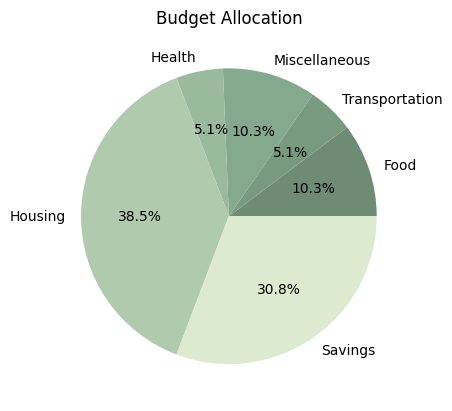

In [5]:
# Add data visualization (e.g., pie chart, bar graph) to present budget allocation:
# Define custom colors
custom_colors = ['#6d8c73', '#789a7f', '#84a98c', '#9aba9d', '#b0caae', '#dceacf']

budget.plot(kind='pie', 
            y='BudgetAmount', 
            labels=budget['Category'], 
            autopct='%1.1f%%',
            colors=custom_colors,
            legend=False)
plt.title('Budget Allocation')
plt.ylabel('')
plt.show()

# Import Expenses CSV file

In [6]:
# Specify the file path
file_path = "/Users/juanflores/Documents/Fake Expenses 2023.csv"

# Read CSV file
expenses = pd.read_csv(file_path)

# Ensure the 'Date' column is in datetime format
expenses['Date'] = pd.to_datetime(expenses['Date'])

expenses.head()

,Date,Category,Notes,Amount
0,2023-03-07,Food,BurgerBlitz,$6.55
1,2023-04-04,Food,BurgerBlitz,$6.95
2,2023-03-03,Food,BurgerBlitz,$7.09
3,2023-01-06,Food,BurgerBlitz,$7.54
4,2023-09-12,Food,DailyChoice Foods,$7.72


In [7]:
expenses.dtypes

Date        datetime64[ns]
Category            object
Notes               object
Amount             float64
dtype: object

In [8]:
# Specify the column you want to find unique values in
column_name = 'Category'

# Get unique values from the specified column
unique_values = expenses[column_name].unique()
unique_values

array(['Food', 'Health', 'Housing', 'Miscellaneous', 'Savings',
       'Transportation'], dtype=object)

# Import Income CSV File

In [9]:
# Specify the file path
file_path = '/Users/juanflores/Documents/Fake-Income.csv'

# Read CSV file
income = pd.read_csv(file_path)

# Ensure the 'Date' column is in datetime format
income['Date'] = pd.to_datetime(income['Date'])

# Display the data table
income.head()

,Date,Source,Amount
0,2023-01-06,Wages - NovaSynergy Solutions,"$2,018.82"
1,2023-01-20,Wages - NovaSynergy Solutions,"$1,994.25"
2,2023-02-03,Wages - NovaSynergy Solutions,"$1,976.87"
3,2023-02-17,Wages - NovaSynergy Solutions,"$2,042.74"
4,2023-03-03,Wages - NovaSynergy Solutions,"$1,966.23"


# Calculate monthly spending and remaining budget

### Specify the month and year you are interested in:

In [10]:
# Specify the month and year you are interested in
month = 11
year = 2023

month_name = calendar.month_name[month]

# Filter expenses by the specified month and year
monthly_expenses = expenses[(expenses['Date'].dt.month == month) & (expenses['Date'].dt.year == year)]

In [11]:
# Calculate total month-to-date spending
total_mtd_spending = calculate_total_monthly_spending(monthly_expenses)

# Calculate month-to-date spending grouped by category
mtd_spending_by_category = calculate_mtd_spending_by_category(monthly_expenses)

# Merge the MTD spending with the Budget DataFrame
budget_with_spending = pd.merge(budget, mtd_spending_by_category, on='Category', how='left')

# Fill NaN values in the 'Amount' column with 0 (if there's no spending for a category)
budget_with_spending['Amount'] = budget_with_spending['Amount'].fillna(0)

# Calculate the remaining budget by subtracting MTD spending from BudgetAmount
budget_with_spending['RemainingBudget'] = budget_with_spending['BudgetAmount'] - budget_with_spending['Amount']

# Calculate the total remaining budget
total_remaining_budget = calculate_monthly_budget_variance(total_monthly_budget, total_mtd_spending)

# Calculate YTD Budget Variance

In [12]:
# Filter Year-to-Date Expenses
ytd_expenses = expenses[(expenses['Date'].dt.month <= month) & (expenses['Date'].dt.year == year)]

# Calculate Total YTD Spending
total_ytd_spending = calculate_total_ytd_spending(ytd_expenses)

# Calculate Total YTD Budget
total_ytd_budget = calculate_total_ytd_budget(budget, month)

# Calculate YTD Budget Variance
ytd_budget_variance =  calculate_ytd_budget_variance(total_ytd_budget, total_ytd_spending)

# Calculate Monthly Net Income

In [13]:
# Net Income = Total Income - Total Expenses

# Filter income by the specified month and year
monthly_income = income[(income['Date'].dt.month == month) & (income['Date'].dt.year == year)]

# Calculate total monthly income
total_monthly_income = calculate_total_monthly_income(monthly_income)

# Calculate Monthly Net Income
monthly_net_income = calculate_monthly_net_income(total_monthly_income, total_mtd_spending)

# Calculate YTD Net Income

In [14]:
# YTD Net Income = Total YTD Income - Total YTD Spending

# Calculate Total YTD Income
ytd_income = income[(income['Date'].dt.month <= month) & (income['Date'].dt.year == year)]
total_ytd_income = calculate_total_ytd_income(ytd_income)

# Calculate YTD Net Income
ytd_net_income = calculate_ytd_net_income(total_ytd_income, total_ytd_spending)

# Display the results

In [15]:
# Print the results
print(f"{month_name} {year}")
print("Total Month-to-Date Spending:", total_mtd_spending)
print('Total Remaining Budget =', total_remaining_budget, '= Monthly Budget Variance')
print(f"YTD Budget Variance: {ytd_budget_variance}")
print(f"Total Monthly Income: {total_monthly_income}")
print(f"Monthly Net Income: {monthly_net_income}")
print(f"YTD Net Income: {ytd_net_income}")
budget_with_spending

November 2023
Total Month-to-Date Spending: 3561.62
Total Remaining Budget = 338.38 = Monthly Budget Variance
YTD Budget Variance: 2841.37
Total Monthly Income: 4024.24
Monthly Net Income: 462.62
YTD Net Income: 8553.84


,Category,BudgetAmount,Amount,RemainingBudget
0,Food,$400.00,$316.59,$83.41
1,Transportation,$200.00,$116.93,$83.07
2,Miscellaneous,$400.00,$255.13,$144.87
3,Health,$200.00,$207.97,$-7.97
4,Housing,"$1,500.00","$1,465.00",$35.00
5,Savings,"$1,200.00","$1,200.00",$0.00


# Plot monthly budget and spending

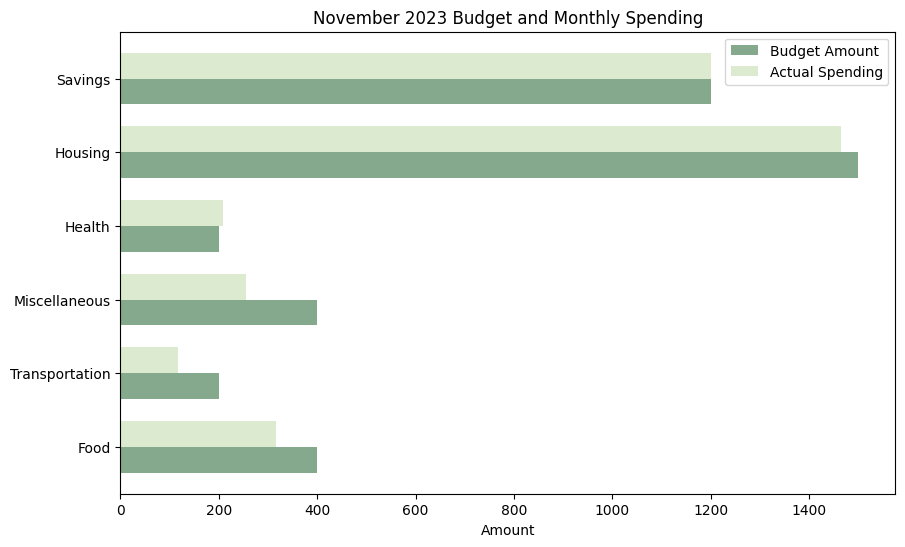

In [16]:
# Sample data (you can modify it as per your actual values)
data = {
    'Category': budget_with_spending['Category'],
    'Budget Amount': budget_with_spending['BudgetAmount'],
    'Actual Spending': budget_with_spending['Amount']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the position and width of the bars
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(df))

# Plot bars
ax.barh(index, df['Budget Amount'], bar_width, label='Budget Amount', color='#84a98c')
ax.barh([i + bar_width for i in index], df['Actual Spending'], bar_width, label='Actual Spending', color='#dceacf')

# Add labels and title
ax.set_xlabel('Amount')
ax.set_title(f"{month_name} {year} Budget and Monthly Spending")
ax.set_yticks([i + bar_width / 2 for i in index])
ax.set_yticklabels(df['Category'])
ax.legend()

# Save the chart as a PNG file
plt.savefig('budget_monthly_spending.png', format='png', dpi=300)  # Adjust dpi for higher quality if needed

# Display the plot
plt.show()